In [4]:
import requests
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style


def get_ltp(index1 ="NIFTY 50"):
  url_indices= "https://www.nseindia.com/api/allIndices"
  headers = {'User-Agent': 'Mozilla/5.0'}
  page = requests.get(url_indices, headers=headers)
  data = json.loads(page.text)
  for index in data["data"]:
      if index["index"]==index1:
          ltp = index["last"]
  return ltp

def Print_OI(index = "NIFTY 50",num = 10,Exp = 0):
  ltp = get_ltp(index)
  #print(ltp)
  ltp1 =str(ltp)
  if index == "NIFTY 50":
    symbol = 'NIFTY'
  if index == "NIFTY BANK":
    symbol = 'BANKNIFTY'
  if index == "NIFTY FINANCIAL SERVICES":
    symbol = 'FINNIFTY'
  if index == "NIFTY MIDCAP SELECT":
    symbol = 'MIDCPNIFTY'

  new_url ="https://www.nseindia.com/api/option-chain-indices?symbol="+ symbol
  headers = {'User-Agent': 'Mozilla/5.0'}
  page = requests.get(new_url, headers=headers)
  data = json.loads(page.text)
  currExpiryDate = data["records"]["expiryDates"][Exp]
  temp =len(data['records']['data'])
  strike = np.zeros((temp))
  X = np.zeros(((2*num)+1,5))
  diff = np.zeros((temp,1))
  count =0
  for item in data['records']['data']:
      if item["expiryDate"] == currExpiryDate:
        skp =  item['strikePrice']
        strike[count] = item['strikePrice']
        diff[count] =[ abs(skp - ltp)]
        tt=abs(skp - ltp)
        count = count +1

  new_diff = diff[0:count]
  center = np.argmin(new_diff)
  #print(center)
  count = 0
  for item in data['records']['data']:
      if item["expiryDate"] == currExpiryDate:
        if item['strikePrice']>=  strike[center-num] and item['strikePrice']<=strike[center+num]:
          X[count,:] = [item['strikePrice'],item['CE']['openInterest'],item['CE']['changeinOpenInterest'],item['PE']['openInterest'],item['PE']['changeinOpenInterest']]
          count = count +1

  xpos = X[0:,0]

  Pw = 80*(xpos[1] -xpos[0])/100
  Cw = 50*(xpos[1] -xpos[0])/100
  PE_value = X[0:,3]
  CE_value = X[0:,1]
  lastP = strike[center]
  #print(lastP)

  lw = 10*(xpos[1] -xpos[0])/100
  cp = 110*(X[0:,1].max())/100
  dp = 112*(X[0:,1].max())/100
 # print(cp)
 # print(dp)

  CE_chvalue = X[0:,2]
  PE_chvalue = X[0:,4]
  fig, (axs1, axs2) = plt.subplots(2, 1, figsize = (15, 8))
  #style.use('ggplot')
  fig.suptitle(symbol +' Option Chain'+" (Expiry Date= "+currExpiryDate+")")

  axs1.bar(xpos, PE_value,color ='red',width = Pw)
  axs1.bar(xpos, CE_value,color ='green',width = Cw)
  axs1.bar(lastP, cp,color ='black',width = lw)
  axs1.text(lastP-Pw,dp ,ltp1,color ='blue',fontsize=12)
  axs2.title.set_text('CHANGE IN OI')
  axs2.bar(xpos, PE_chvalue,color ='red',width = Pw)
  axs2.bar(xpos, CE_chvalue,color ='green',width = Cw)

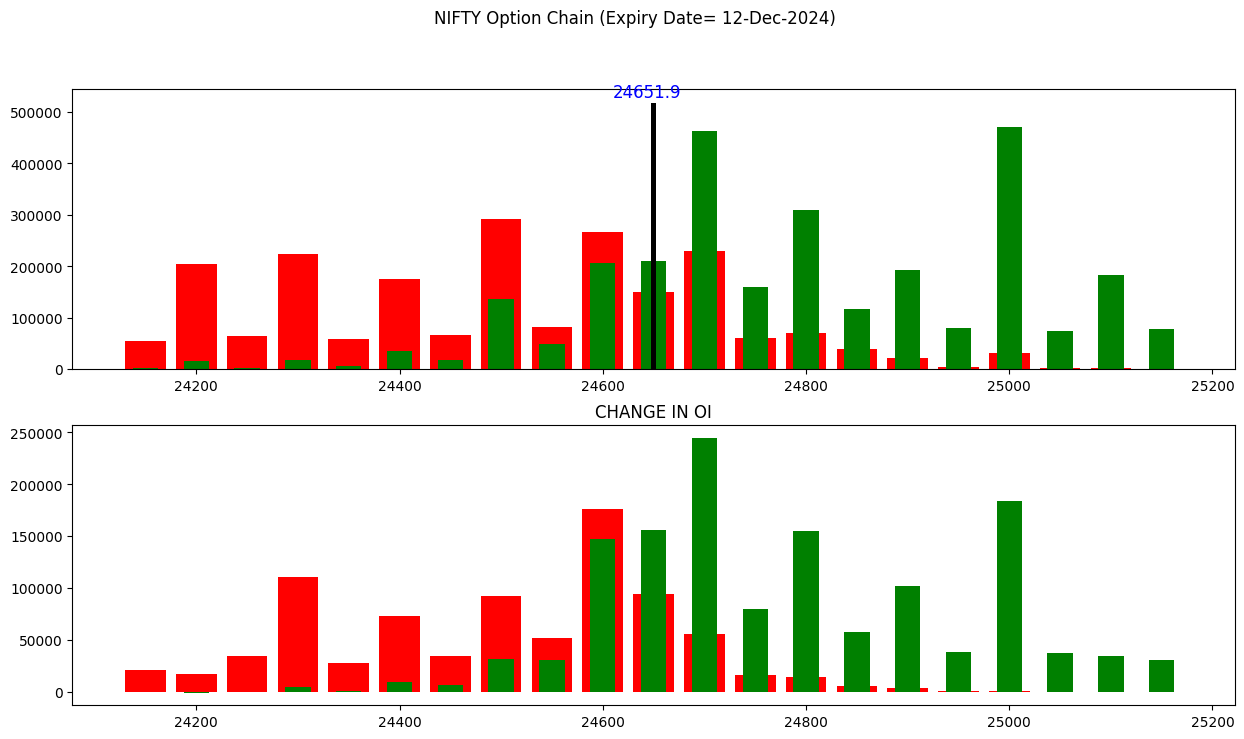

In [9]:
Print_OI("NIFTY 50",10,0)     #(index = "NIFTY 50","NIFTY BANK","NIFTY FINANCIAL SERVICES","NIFTY MIDCAP SELECT")